In [262]:
import matplotlib.pyplot as plt
import numpy as np


In [263]:
data=np.loadtxt("ex2data1.txt",delimiter=',')
X=data[:,0:2]
y=data[:,2]
m=np.size(y)




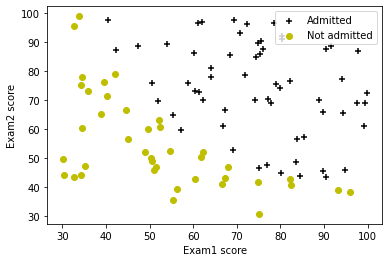

In [264]:
def plotData(X,y):
    plt.figure()
    pos=np.where(y==1)[0]
    neg=np.where(y==0)[0]
    plt.scatter(X[pos,0],X[pos,1],marker='+',c='k')
    plt.scatter(X[neg,0],X[neg,1],c='y')
    plt.xlabel("Exam1 score")
    plt.ylabel("Exam2 score")
    plt.legend(('Admitted', 'Not admitted'), loc='upper right')
   

plotData(X,y)

In [265]:
u = np.linspace(-1, 1.5, 50) # 50,
v = np.linspace(-1, 1.5, 50)
        
z = np.zeros((np.size(u), np.size(v)))

u,v,z

(array([-1.        , -0.94897959, -0.89795918, -0.84693878, -0.79591837,
        -0.74489796, -0.69387755, -0.64285714, -0.59183673, -0.54081633,
        -0.48979592, -0.43877551, -0.3877551 , -0.33673469, -0.28571429,
        -0.23469388, -0.18367347, -0.13265306, -0.08163265, -0.03061224,
         0.02040816,  0.07142857,  0.12244898,  0.17346939,  0.2244898 ,
         0.2755102 ,  0.32653061,  0.37755102,  0.42857143,  0.47959184,
         0.53061224,  0.58163265,  0.63265306,  0.68367347,  0.73469388,
         0.78571429,  0.83673469,  0.8877551 ,  0.93877551,  0.98979592,
         1.04081633,  1.09183673,  1.14285714,  1.19387755,  1.24489796,
         1.29591837,  1.34693878,  1.39795918,  1.44897959,  1.5       ]),
 array([-1.        , -0.94897959, -0.89795918, -0.84693878, -0.79591837,
        -0.74489796, -0.69387755, -0.64285714, -0.59183673, -0.54081633,
        -0.48979592, -0.43877551, -0.3877551 , -0.33673469, -0.28571429,
        -0.23469388, -0.18367347, -0.13265306, -0

In [266]:
def sigmoid(z):
    sig=1.0/(1+np.exp(-z))
   
    return sig



In [267]:
X=np.hstack((np.ones((m,1)),X))
X.shape

(100, 3)

In [268]:
theta=np.zeros(3)


In [269]:
def costFunction(theta, X, y):
    m=y.size
    prediction=X.dot(theta)

    h=sigmoid(prediction)
    J=-1.0/m*(y*np.log(h)+(1-y)*np.log(1-h))
    J_sum=np.sum(J)

    error=h-y
    grad=1/m*(error.T.dot(X))
    return J_sum,grad
costFunction(theta,X,y)


(0.6931471805599457, array([ -0.1       , -12.00921659, -11.26284221]))

In [270]:
import scipy.optimize as op

def myCost(theta,X,y):
    m,n=X.shape
    prediction=X.dot(theta)
    h=sigmoid(prediction)
   
    J=1.0/m*np.sum(-y*np.log(h)-(1-y)*np.log(1-h))
    
    return J


In [271]:
def myGradient(theta,X,y):
    m=y.size
    prediction=X.dot(theta)
    h=sigmoid(prediction)
    error=h-y

    grad=1/m*(error.T.dot(X))
    
    return grad[0]

costFunc = lambda p: costFunction(p, X, y)[0]
gradFunc = lambda p: costFunction(p, X, y)[1]

init_theta=np.zeros(3)  
Result = op.minimize(fun = costFunc, x0 = init_theta, method = 'TNC', jac = gradFunc)

cost=Result.fun
theta=Result.x



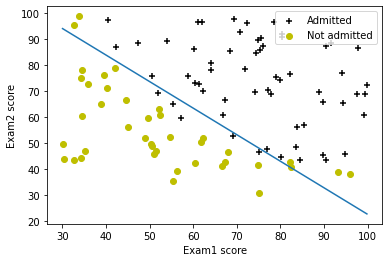

In [272]:
def plotDecisionBoundary(theta, X, y):
   
    if(np.size(X,1)<=3):
        
        plotData(X[:,1:],y)
        plt_x=np.array([np.min(X[:,1]),np.max(X[:,1])])
        plt_y = (-1 / theta[2]) * (theta[1] * plt_x + theta[0])
        plt.plot(plt_x,plt_y)
    
    else:
        plotData(X[:,1:],y)
        u = np.linspace(-1, 1.5, 50) # 50,
        v = np.linspace(-1, 1.5, 50)
        
        z = np.zeros((np.size(u), np.size(v)))
    
        # z = theta * x 를 grid 상에서 평가한다.
        for i in np.arange(np.size(u)):
            for j in np.arange(np.size(v)):
                z[i, j] = np.sum(mapFeature([u[i]], [v[j]]) * theta)
               
        z = z.T # contour를 호출하기 전에 transpose하는 것이 중요하다.
        
        # Plot z = 0
        # range를 [0, 0]으로 할 필요가 있다.
        # contour(u, v, z, [0, 0], 'LineWidth', 2); # Octave code
        plt.contour(u, v, z)
plotDecisionBoundary(theta,X,y)

In [273]:
def predict(theta, X):
    prediction=X.dot(theta)
    h=sigmoid(prediction)
    pos=np.where(h>=0.5)
    neg=np.where(h<0.5)
    
    h[pos]=1
    h[neg]=0
    return h

predict(theta,np.array([[1,45,85]]))


array([1.])

In [274]:
data=np.loadtxt("ex2data2.txt",delimiter=",")
X=data[:,0:2]
y=data[:,2]


In [275]:
def mapFeature(X1, X2):
    degree = 6
    
    m = np.size(X1)
    out = np.ones(m)
    res = []
    res.append(out)
    
    for i in np.arange(1, degree + 1):
        for j in np.arange(0, i + 1):
            out1 = (X1 ** (i - j)) * (X2 ** j)
            res.append(out1)
    
    return np.array(res).T



In [276]:
X_reg=mapFeature(X[:,0],X[:,1])

In [277]:
def costFunctionReg(theta, X, y, s_lambda):
    
    m, n = X.shape
    J = 0
    grad = np.zeros(np.size(theta))
    
    
     
    sum_theta_square = np.sum(theta[1:] ** 2)
    
    
    X_theta = X.dot(theta)
    prediction = sigmoid(X_theta)

    
    J = 1/m * np.sum(-y * np.log(prediction) - (1 - y) * np.log(1 - prediction))+ s_lambda / (2 * m) * sum_theta_square
        

    error = prediction - y
    delta = 1/m * error.T.dot(X)
    
    temp = theta
    temp[0] = 0
    regular = (s_lambda / m) * temp
    
    grad = delta + regular
    
    return J, grad

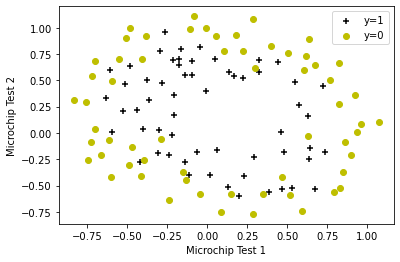

In [278]:
data = np.loadtxt('ex2data2.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2]
m=np.size(y)
plotData(X, y)
X_reg=mapFeature(X[:,0],X[:,1])
# 라벨과 legend 설정
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
initial_theta = np.zeros(X_reg.shape[1])
plt.legend(('y=1', 'y=0'), loc='upper right')


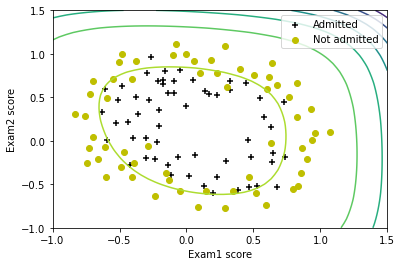

In [279]:
s_lambda = 1
costFunc = lambda p: costFunctionReg(p, X_reg, y, s_lambda)[0]
gradFunc = lambda p: costFunctionReg(p, X_reg, y, s_lambda)[1]
Result = op.minimize(fun = costFunc, x0 = initial_theta, method = 'CG', jac = gradFunc, options = {'maxiter': 400})
cost=Result.fun
theta=Result.x
plotDecisionBoundary(theta,X_reg,y)